# Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Нужно понять, почему происходит отток клиентов

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Ваша задача — провести анализ и подготовить план действий по удержанию клиентов:
 
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; 
- проанализировать основные признаки, наиболее сильно влияющие на отток; 
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1. Выделить целевые группы клиентов 
2. Предложить меры по снижению оттока 
3. Определить другие особенности взаимодействия с клиентами.

**Описание данных**

'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Загрузить данные, ознакомиться с ними

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1546,1,1,1,1,1,12,0,33,84.176760,12.0,1,1.674687,1.820273,0
1027,0,1,0,0,1,1,0,28,72.104475,1.0,5,0.843915,0.928677,0
806,1,1,0,0,1,1,0,23,215.930003,1.0,4,1.283945,0.599889,1
1209,1,1,1,0,1,6,0,31,278.867984,6.0,8,0.299157,0.197889,0
3104,1,1,0,0,1,6,1,23,114.316460,4.0,2,2.188799,2.133338,0
426,0,0,0,0,1,1,0,22,165.298171,1.0,0,0.754360,0.578056,1
653,1,1,0,0,1,6,0,28,264.842807,6.0,3,2.875982,2.849407,0
1837,0,1,0,0,1,1,0,29,99.245578,1.0,1,1.357434,1.199090,1
2364,0,1,0,0,1,1,0,29,311.187187,1.0,1,1.991406,1.984092,0
2112,0,1,0,0,1,12,1,35,165.996608,11.0,6,2.468044,2.422943,0


In [3]:
df.columns = [x.lower() for x in df.columns] # привел наименования колонок в нижний регистр
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [4]:
#переведем тип данных в целочисленный
df.month_to_end_contract = df.month_to_end_contract.astype(np.int64)

Импортировал библиотеки, открыл файл, посмотрел данные, привел все в нижний регистр, поработал с типами данных.

## Исследовательский анализ данных (EDA)

**Изучить средние значения и стандартные отклонения**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Общее количество клиентов 4000, по гендерному признаку примерно одинаковое количество. Основная часть клиентов проживают или работают в районе, где находится фитнес-центр и почти половина из них имеют сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент.

Использовали промо-код от знакомого при оплате первого абонемента составляет 30 %, таким образом клиенты сами приводят своих друзей, что в будущем может отразиться позитивно на доходности от услуг фитнеса, например при посещении групповых занятий, где доля посещаемости составляет 41 %.

90 % клиентов дают свои мобильные телефоны, с помощью которых можно информировать о различных акциях, продлениях абонементов. Длина абонемента в основном 1 мес или 6 мес. Возраст клиентов находится в основном от 27 до 31 года, это хорошо, так как это молодое и платёжеспособное население, которое в будущем может позитивно сказаться на прибыльности фитнес центра.

Суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон находятся в диапазоне от 68 до 210.

Время с момента первого обращения в фитнес-центр в месяцах составляет от 1 до 5, что не очень хорошо, так как клиенты в основном новые, возможно это связано с тем, что в партнерских компаниях высокая текучка кадров и новые клиенты приходят от них.

Средняя частота посещений в неделю за все время с начала действия абонемента находится в диапазоне 1 до 3, то есть клиенты не так часто посещают фитнес.

Средняя частота посещений в неделю за предыдущий месяц находится в диапазоне от 1 до 3.

26,5 % клиентов уходят каждый месяц.

**Проверить файл на наличие пропусков и дублей.**

In [6]:
df.isna().sum() # проверил пропуски в файле

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
df.duplicated().sum() # проверил дубли

0

Пропуски и явные дублирующие данные отсутствуют

**Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**

In [8]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


По гендерному признаку почти одинаково, уходящие, которые близко к фитнес-центру также в большом количестве (76%) уходят. По партнёрским договоренностям больше половины остаются и 35 % уходят, следовательно скидки работают и нужно продолжать развивать это направление. Те, кто пришли от приглашенных друзей уходят намного реже (18,4 %), поэтому, как вариант, можно сделать одной из точек роста приглашения друзей, так как они в общей массе остаются. Телефон оставляют почти все клиенты. Абонементы остающихся клиентов зачастую пол года, у уходящих 1-2 месяца. Уходящие клиенты редко ходят на групповые занятия, возможно это связано с низкой заинтересованностью и очень редко посещают фитнес, а именно 1 раз в неделю. Остающиеся клиенты приносят выручки  от других услуг фитнес-центра больше на 37 %, чем уходящие.

**Построю столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался**

In [9]:
df.groupby('churn')['churn'].mean()

churn
0    0
1    1
Name: churn, dtype: int64

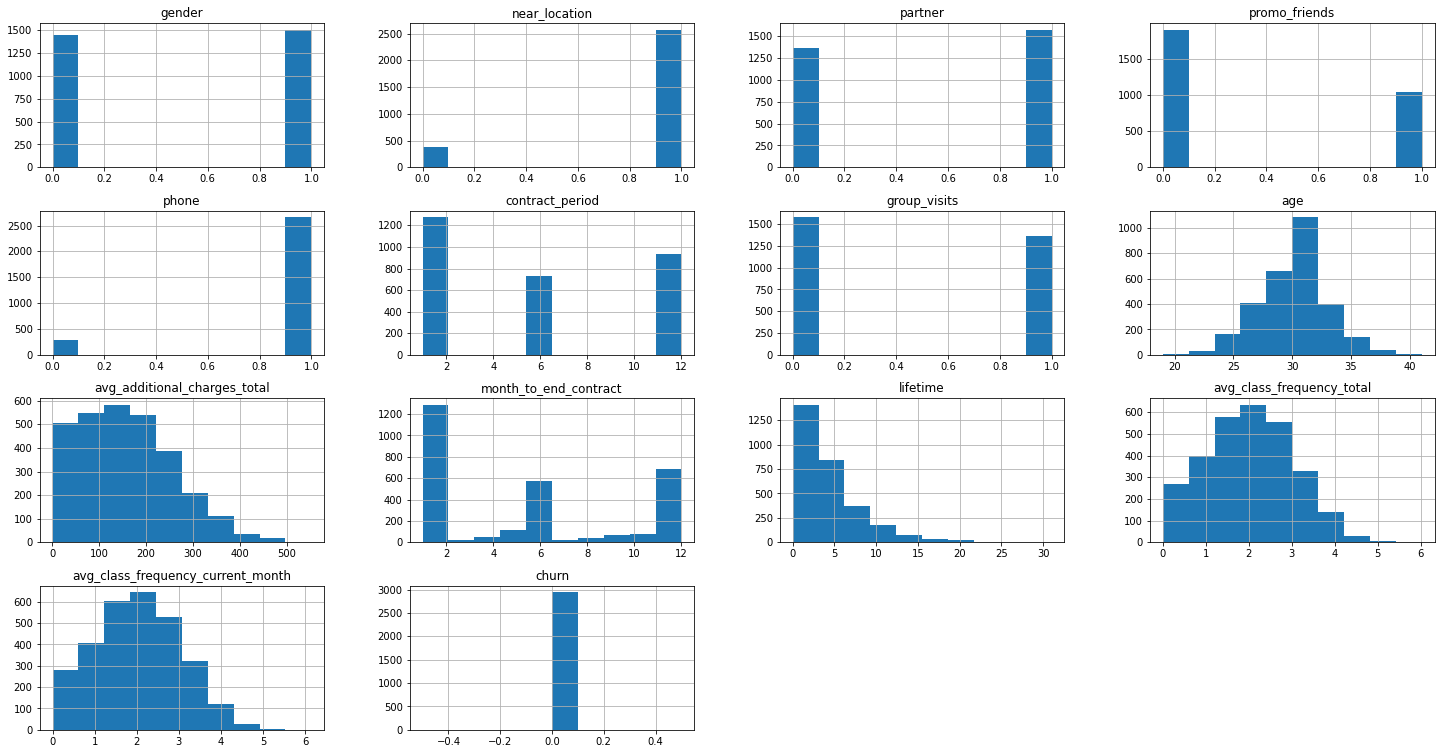

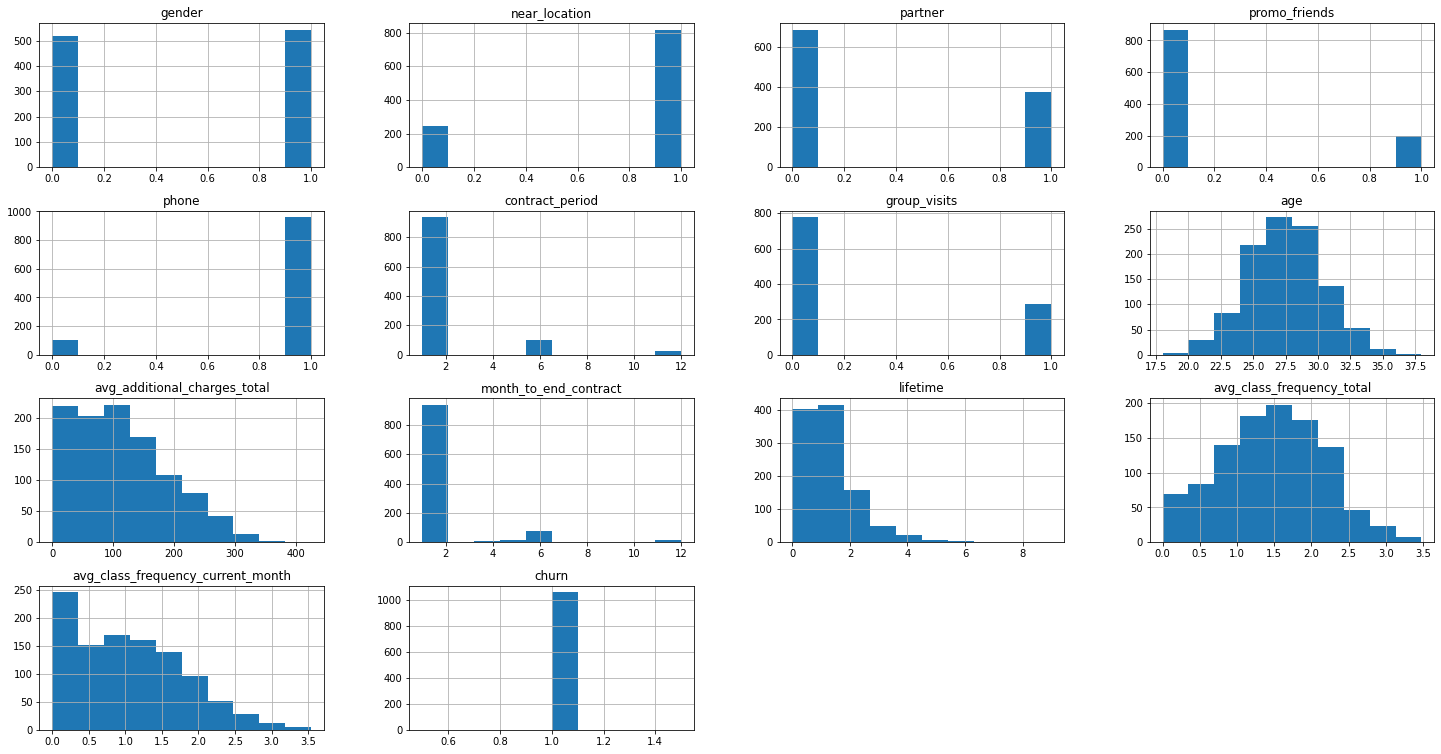

In [10]:
# верхние гистограммы относятся к тем, кто НЕ ушел
# нижние гистограммы относятся к тем, кто ушел, начало с gender
df.groupby('churn').hist(figsize=(25, 13));

По гендерному признаку те, кто уходят и те, кто остаются по-прежнему в равных пропорциях. Кто остаются зачастую проживают или работают в районе, где находится фитнес-центр, но те кто уходят, у них доля тех, кто работают или проживают не в этом районе, выше.

Уходящие клиенты без сотрудничества с компаниями покидают фитнес-центры больше чем те, у кого это сотрудничество есть. Таким образом, скидки партнёрские все же работают.

Уходящие в основном приобретают месячные абонементы, проходит месяц - два и потом отваливаются, при этом они также особо не посещают групповые занятия, их возраст варьируется от 25 до 30 лет.

Те, кто остаются приносят больше суммарной выручки для фитнес-центров, таким образом, долгосрочное взаимодействие более прибыльно.

Клиенты, посещающие зал 2-3 раза в неделю чаще всего остаются надолго, нежели чем те, которые посещают редко, они скорее всего уйдут после окончания абонемента.

**Построю матрицу корреляций (взаимосвязей) с помощью тепловой карты**

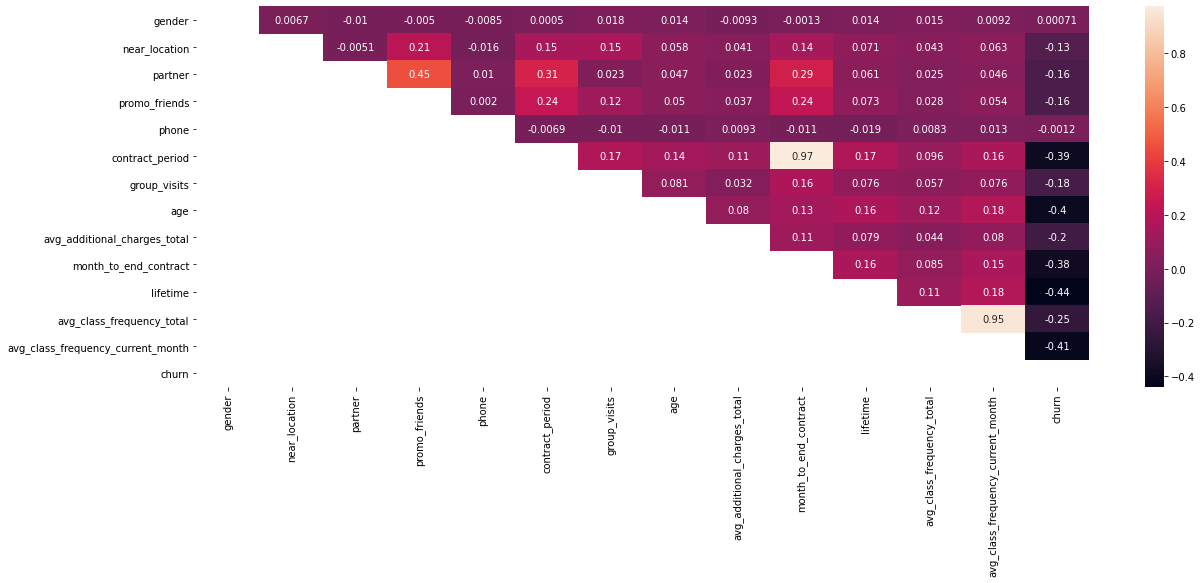

In [21]:
correlation = df.corr()
mask = np.tril(correlation.corr())
plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot = True, mask=mask);

Сильно зависят друг от друга длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента. Также сильно зависят средняя частота посещений в неделю за предыдущий месяц и средняя частота посещений в неделю за все время с начала действия абонемента, чем чаще посещают, тем больше вероятность того, что клиент останется надолго.

Отмечу, что партнёрские скидки с использовальзованием промо-кода от знакомого при оплате первого абонемента тоже имеют позитивную динамику, то есть те, кто получают партнёрские скидки от работы приводят с собой друзей, чтобы было "веселее" заниматься.

И прослеживается обратная зависимость, чем меньше посещают фитнес-центр, тем больше вероятность ухода клиента, так как нет заинтересованности, тоже самое можно сказать и про возраст, чем ниже возраст, тем выше вероятность оттока клиентов, и наоборот. 

## Построение модели прогнозирования оттока клиентов

Построю модель бинарной классификации клиентов, где **целевой признак — факт оттока клиента в следующем месяце.**

Сравню модели логистической регрессии и случайного леса. Какая модель покажет себя лучше на основании метрик accuracy, precision и recall?

**Сперва построю модель логистической регрессии**

In [12]:
# исключаю целевой признак из датафрейма
X = df.drop('churn', axis = 1)
# добавляю целевой признак в у
y = df['churn']

In [13]:
# разделяем модель на обучающую и валидационную выборку в соотношении 80 обучающая выборка и 20 валидационная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cтандартизируем данные
scaler = StandardScaler()
scaler.fit(X_train)
x_train_st = scaler.transform(X_train)
x_test_st = scaler.transform(X_test)

In [22]:
# зададим алгоритм для нашей модели логистической регрессии
model_logi_regression = LogisticRegression(random_state=0)

# обучим модель на обучающей выборке
model_logi_regression.fit(x_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities_regress = model_logi_regression.predict_proba(x_train_st)[:, 1]

# бинарный прогноз результатом чего будет 0 и 1
predictions_regress = model_logi_regression.predict(x_test_st)

# выведите все изученные метрики для полученного прогноза
print('Метрики модели логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_regress)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_regress)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_regress)))
print('\tF1: {:.2f}'.format(f1_score(y_test, predictions_regress))) 

Метрики модели логистической регрессии
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
	F1: 0.84


**Проделаем тоже самое с моделью случайный лес**

In [23]:
# создаем модель
model_forest = RandomForestClassifier(random_state=0)
# обучаем
model_forest.fit(x_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities_forest = model_logi_regression.predict_proba(x_train_st)[:, 1]

# бинарный прогноз результатом чего будет 0 и 1
predictions_forest = model_forest.predict(x_test_st)

# выведите все изученные метрики для полученного прогноза
print('Метрики модели случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_forest)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_forest)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_forest)))
print('\tF1: {:.2f}'.format(f1_score(y_test, predictions_forest))) 

Метрики модели случайного леса
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
	F1: 0.83


**Accuracy** метрики двух моделей одинаковые, так как в этой метрике чем ближе к 1, тем лучше, так как она отражает долю правильных ответов.

**Precision** у логистической регрессии чуть лучше, так как он ближе к 1, то есть доля правильных ответов только среди целевого класса выше чем у случайного леса.

**Recall** также выше у логистической регрессии. Здесь метрика обнаружила с помощью модели логистической регрессии больше реальных объектов.

**F1** также показала себя лучше в модели логистическая регрессия.

Обе модели хорошо себя проявили, но модель логистической регрессии показала себя лучше.

## Сделать кластеризацию клиентов

Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Стандартизирую данные и построю матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисую дендрограмму, чтобы определить, на какое количество кластеров можно разделить.**

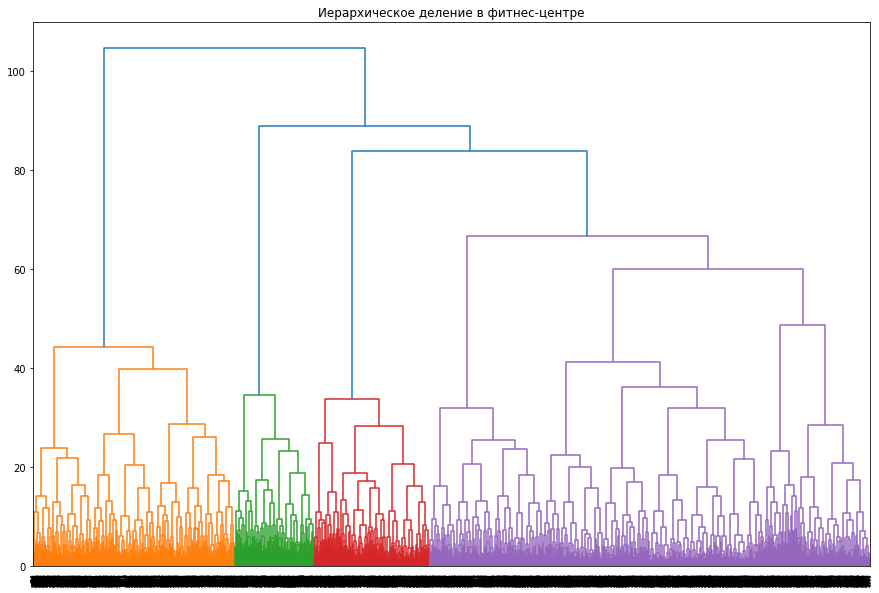

In [16]:
# Зададим "стандартизатор"
scaler = StandardScaler()

# Стандартизируем данные
x_st = scaler.fit_transform(X)

# нарисуем дендограмму
linked = linkage(x_st, method = 'ward') 
plt.figure(figsize=(15, 10)) 
dendrogram(linked, orientation='top')
plt.title('Иерархическое деление в фитнес-центре');

На дендограмме появились 4 цвета, поэтому буду делить на 4 кластера.

**Обучу модель кластеризации на основании алгоритма K-Means и спрогнозирую кластеры клиентов**

Принял решение все же поделить на 5 кластеров

In [17]:
# Зададим модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# Спрогнозируем кластеры для наблюдений
labels = km.fit_predict(x_st)

# Сохраним метки кластера в поле нашего датасета
df['cluster_km'] = labels

# Переименуем названия кластеров
df.loc[df['cluster_km']==0, 'cluster_km'] = 'cluster_1'
df.loc[df['cluster_km']==1, 'cluster_km'] = 'cluster_2'
df.loc[df['cluster_km']==2, 'cluster_km'] = 'cluster_3'
df.loc[df['cluster_km']==3, 'cluster_km'] = 'cluster_4'
df.loc[df['cluster_km']==4, 'cluster_km'] = 'cluster_5'

# Выведем средние значения признаков для кластеров
round(df.groupby('cluster_km').mean(), 2).T

cluster_km,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


In [18]:
(
    df.groupby('cluster_km')['churn'].mean()
    .reset_index()
    .sort_values(by='churn', ascending=False)
) # отсортирую кластеры по убыванию

,cluster_km,churn
3,cluster_4,0.514263
2,cluster_3,0.443564
1,cluster_2,0.267532
4,cluster_5,0.068019
0,cluster_1,0.027723


Кластеры 4, 3 и 2 имеют наибольшую долю оттока клиентов. Самое наименьшее количество оттока клиентов происходит в кластере 1 и кластере 5.

Характеристики приблизительно схожи с теми, которые описывал ранее.

Для более наглядного разделения требуется построить распределение для каждого признака по кластерам.

**Анализ распределения признаков для кластеров**

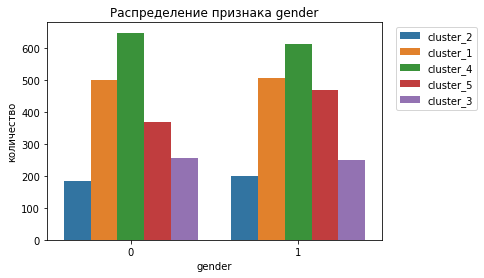

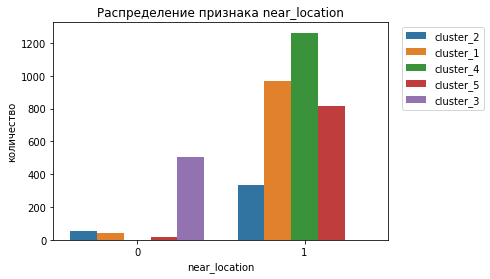

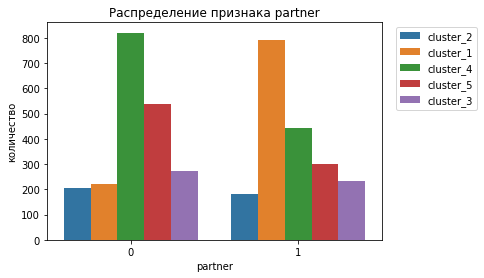

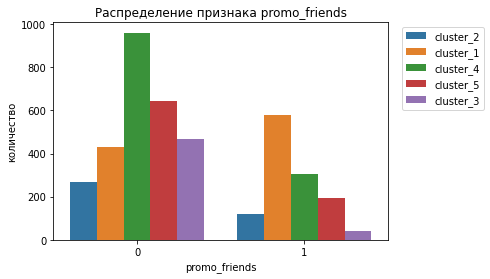

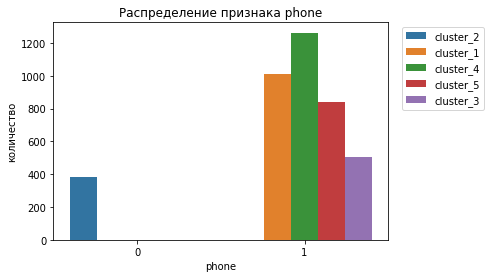

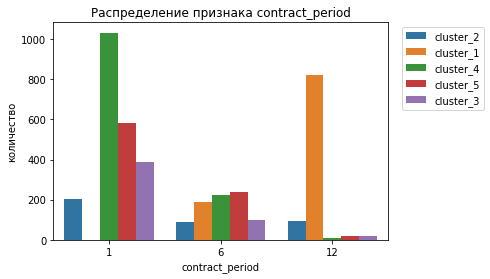

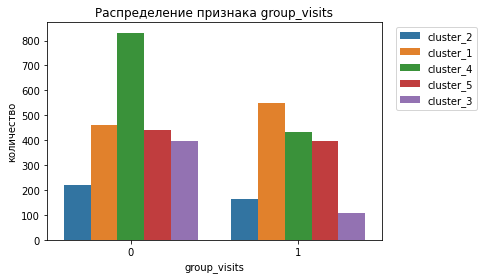

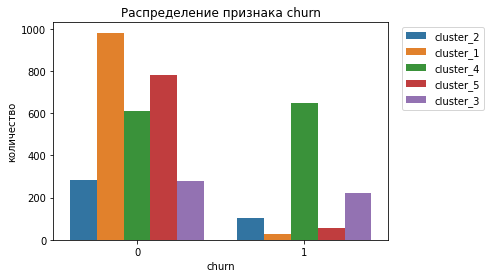

In [19]:
# Построим график для логических и дискретных величин
log_discr_values = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']
fig, ax = plt.subplots()
for column in log_discr_values:
    plt.title("Распределение признака "+column)
    sns.countplot(data=df, x=column, hue='cluster_km')
    plt.xlabel(column)
    plt.ylabel("количество")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()

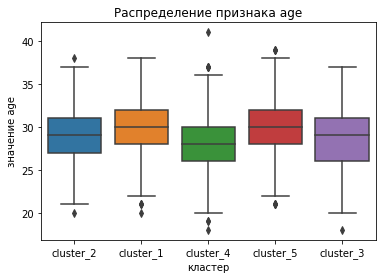

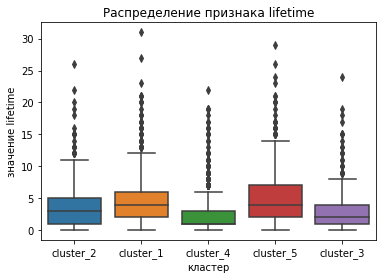

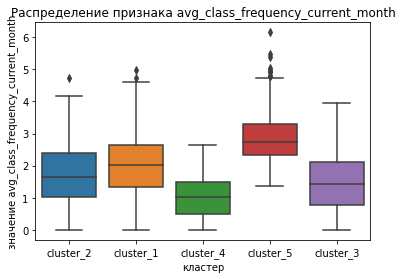

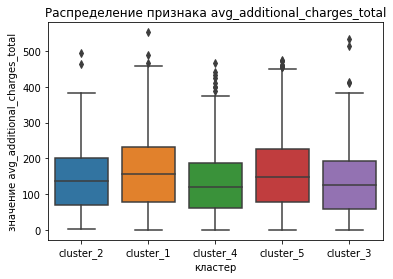

In [20]:
# Построим график для непрерывных величин
cont_values = ['age', 'lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']
fig, ax = plt.subplots()
for column in cont_values:
    plt.title("Распределение признака "+column)
    sns.boxplot(x='cluster_km', y=column, data=df)
    plt.xlabel('кластер')
    plt.ylabel('значение '+column)
    plt.show()

Характеристики все схожи с предыдущими выводами, но с определенными особенностями по кластерам. 

## Выводы и рекомендации по работе с клиентами

Импортировал библиотеки, открыл файл, посмотрел данные, привел все в нижний регистр, поработал с типами данных.


Ознакомился с данными и сделал следующие выводы

Общее количество клиентов 4000, по гендерному признаку примерно одинаковое количество. Основная часть клиентов проживают или работают в районе, где находится фитнес-центр и почти половина из них имеют сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент.

Использовали промо-код от знакомого при оплате первого абонемента составляет 30 %, таким образом клиенты сами приводят своих друзей, что в будущем может отразиться позитивно на доходности от услуг фитнеса, например при посещении групповых занятий, где доля посещаемости составляет 41 %.

90 % клиентов дают свои мобильные телефоны, с помощью которых можно информировать о различных акциях, продлениях абонементов. Длина абонемента в основном 1 мес или 6 мес. Возраст клиентов находится в основном от 27 до 31 года, это хорошо, так как это молодое и платёжеспособное население, которое в будущем может позитивно сказаться на прибыльности фитнес центра.

Суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон находятся в диапазоне от 68 до 210.

Время с момента первого обращения в фитнес-центр в месяцах составляет от 1 до 5, что не очень хорошо, так как клиенты в основном новые, возможно это связано с тем, что в партнерских компаниях высокая текучка кадров и новые клиенты приходят от них.

Средняя частота посещений в неделю за все время с начала действия абонемента находится в диапазоне 1 до 3, то есть клиенты не так часто посещают фитнес.

Средняя частота посещений в неделю за предыдущий месяц находится в диапазоне от 1 до 3.

26,5 % клиентов уходят каждый месяц.

Пропуски и явные дублирующие данные отсутствуют

По гендерному признаку почти одинаково, уходящие, которые близко к фитнес-центру также в большом количестве (76%) уходят. По партнёрским договоренностям больше половины остаются и 35 % уходят, следовательно скидки работают и нужно продолжать развивать это направление. Те, кто пришли от приглашенных друзей уходят намного реже (18,4 %), поэтому, как вариант, можно сделать одной из точек роста приглашения друзей, так как они в общей массе остаются. Телефон оставляют почти все клиенты. Абонементы остающихся клиентов зачастую пол года, у уходящих 1-2 месяца. Уходящие клиенты редко ходят на групповые занятия, возможно это связано с низкой заинтересованностью и очень редко посещают фитнес, а именно 1 раз в неделю. Остающиеся клиенты приносят выручки  от других услуг фитнес-центра больше на 37 %, чем уходящие.

Уходящие клиенты без сотрудничества с компаниями покидают фитнес-центры больше чем те, у кого это сотрудничество есть. Таким образом, скидки партнёрские все же работают.

Уходящие в основном приобретают месячные абонементы, проходит месяц - два и потом отваливаются, при этом они также особо не посещают групповые занятия, их возраст варьируется от 25 до 30 лет.

Те, кто остаются приносят больше суммарной выручки для фитнес-центров, таким образом, долгосрочное взаимодействие более прибыльно.

Клиенты, посещающие зал 2-3 раза в неделю чаще всего остаются надолго, нежели чем те, которые посещают редко, они скорее всего уйдут после окончания абонемента.

Сильно зависят друг от друга длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента. Также сильно зависят средняя частота посещений в неделю за предыдущий месяц и средняя частота посещений в неделю за все время с начала действия абонемента, чем чаще посещают, тем больше вероятность того, что клиент останется надолго.

Отмечу, что партнёрские скидки с использовальзованием промо-кода от знакомого при оплате первого абонемента тоже имеют позитивную динамику, то есть те, кто получают партнёрские скидки от работы приводят с собой друзей, чтобы было "веселее" заниматься.

И прослеживается обратная зависимость, чем меньше посещают фитнес-центр, тем больше вероятность ухода клиента, так как нет заинтересованности, тоже самое можно сказать и про возраст, чем ниже возраст, тем выше вероятность оттока клиентов, и наоборот.

**Accuracy** метрики двух моделей одинаковые, так как в этой метрике чем ближе к 1, тем лучше, так как она отражает долю правильных ответов.

**Precision** у логистической регрессии чуть лучше, так как он ближе к 1, то есть доля правильных ответов только среди целевого класса выше чем у случайного леса.

**Recall** также выше у логистической регрессии. Здесь метрика обнаружила с помощью модели логистической регрессии больше реальных объектов.

Обе модели хорошо себя проявили, но модель логистической регрессии показала себя лучше.

Принял решение все же поделить на 5 кластеров. 

Кластеры 4, 3 и 2 имеют наибольшую долю оттока клиентов. Самое наименьшее количество оттока клиентов происходит в кластере 1 и кластере 5.

**РЕКОМЕНДАЦИИ**
- продолжать развивать партнёрские программы с различными работодателями
- в продолжение первой рекомендации стимулировать привлечения друзей клиентам
- развивать долгосрочные отношения с клиентами, так как они приносят много выручки от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон
- обращать внимание на тех клиентов, которые посещают групповые занятия, они в большинстве своём имеют наименьший отток
- стараться продавать длинные абонементы